## Dataset Description (10 points)
Tell us about your dataset, including: 
    - Where you got it
    - Why the source is reliable
    - How it was gathered (study info, participants, etc.)
    - What each column contains and any applicable measurment units

- I got this dataset from URL; "https://www.kaggle.com/kumarajarshi/life-expectancy-who"

Since the observations this dataset are based on different countries, it will be easier for a country to 
determine the predicting factor which is contributing to lower value of life expectancy. 
This will help in suggesting a country which area should be given importance in order to efficiently 
improve the life expectancy of its population.



The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. 

The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website.

On initial visual inspection of the data showed some missing values.The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set.

The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

The data-set aims to answer the following key questions:

- Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
- Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
- How does Infant and Adult mortality rates affect life expectancy?
- Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
- What is the impact of schooling on the lifespan of humans?
- Does Life Expectancy have positive or negative relationship with drinking alcohol?
- Do densely populated countries tend to have lower life expectancy?
- What is the impact of Immunization coverage on life Expectancy?

 Mortality rate is typically expressed in units of deaths per 1,000 individuals per yea

1. Read in your dataset and do all of the necessary transformations and munging including: 
    - Parsing column headers
    - Finding and handling null values
    - Encoding categorical variables
    - Dropping unnecessary columns
    - Binning any large range categorical variables

In [1]:
#Create a function to read the downloaded file into pandas
import numpy as np
import pandas as pd 

data = pd.read_csv("/Users/kajol/Downloads/LifeExpectancy_WHO.csv")
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [2]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [3]:
# parsing the columns;

data.rename(columns={ "Adult Mortality": "Adult_Mortality", "Life expectancy ":"Life_Exp", "Diphtheria ": "Diphtheria",
                     "infant deaths": "Infant_Deaths","percentage expenditure": "Percentage_Exp", " BMI ": "BMI",
                     "Hepatitis B": "Hepatitis_B", "under-five deaths ":"under-five_deaths","Total expenditure": "Total_Exp"," thinness  1-19 years": "thinness_1to19",
                    " thinness 5-9 years": "thinness_5to9","Income composition of resources": "Income_Comp"},inplace=True)

data

,Country,Year,Status,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19,thinness_5to9,Income_Comp,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_Exp', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'Hepatitis_B', 'Measles ',
       'BMI', 'under-five_deaths', 'Polio', 'Total_Exp', 'Diphtheria',
       ' HIV/AIDS', 'GDP', 'Population', 'thinness_1to19', 'thinness_5to9',
       'Income_Comp', 'Schooling'],
      dtype='object')

In [5]:
data.describe()

,Year,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19,thinness_5to9,Income_Comp,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country              2938 non-null object
Year                 2938 non-null int64
Status               2938 non-null object
Life_Exp             2928 non-null float64
Adult_Mortality      2928 non-null float64
Infant_Deaths        2938 non-null int64
Alcohol              2744 non-null float64
Percentage_Exp       2938 non-null float64
Hepatitis_B          2385 non-null float64
Measles              2938 non-null int64
BMI                  2904 non-null float64
under-five_deaths    2938 non-null int64
Polio                2919 non-null float64
Total_Exp            2712 non-null float64
Diphtheria           2919 non-null float64
 HIV/AIDS            2938 non-null float64
GDP                  2490 non-null float64
Population           2286 non-null float64
thinness_1to19       2904 non-null float64
thinness_5to9        2904 non-null float64
Income_Comp          2771 non-null float64


In [7]:
#count the countries where infant death is less than 120
len(data[data['Infant_Deaths']< 120 ])

2817

In [8]:
data.isnull().sum()

Country                0
Year                   0
Status                 0
Life_Exp              10
Adult_Mortality       10
Infant_Deaths          0
Alcohol              194
Percentage_Exp         0
Hepatitis_B          553
Measles                0
BMI                   34
under-five_deaths      0
Polio                 19
Total_Exp            226
Diphtheria            19
 HIV/AIDS              0
GDP                  448
Population           652
thinness_1to19        34
thinness_5to9         34
Income_Comp          167
Schooling            163
dtype: int64

In [9]:
def replace_null_with_mean(input_dataframe, desired_columns):
    for column_name in desired_columns:
        if column_name in input_dataframe and input_dataframe[column_name].dtype.kind in 'if':
            mean_value = input_dataframe[column_name].mean()
            input_dataframe[column_name].fillna(value = mean_value, inplace = True)
    return input_dataframe

In [10]:
df = replace_null_with_mean(data, data.columns)
df

,Country,Year,Status,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19,thinness_5to9,Income_Comp,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.010000,71.279624,65.000000,1154,...,6.0,8.16000,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.010000,73.523582,62.000000,492,...,58.0,8.18000,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.010000,73.219243,64.000000,430,...,62.0,8.13000,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.010000,78.184215,67.000000,2787,...,67.0,8.52000,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.010000,7.097109,68.000000,3013,...,68.0,7.87000,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.010000,79.679367,66.000000,1989,...,66.0,9.20000,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.010000,56.762217,63.000000,2861,...,63.0,9.42000,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.030000,25.873925,64.000000,1599,...,64.0,8.33000,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.020000,10.910156,63.000000,1141,...,63.0,6.73000,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.030000,17.171518,64.000000,1990,...,58.0,7.43000,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [11]:
df.isnull().sum()

Country              0
Year                 0
Status               0
Life_Exp             0
Adult_Mortality      0
Infant_Deaths        0
Alcohol              0
Percentage_Exp       0
Hepatitis_B          0
Measles              0
BMI                  0
under-five_deaths    0
Polio                0
Total_Exp            0
Diphtheria           0
 HIV/AIDS            0
GDP                  0
Population           0
thinness_1to19       0
thinness_5to9        0
Income_Comp          0
Schooling            0
dtype: int64

### Encoding categorical variables;

In [12]:
df.dtypes

Country               object
Year                   int64
Status                object
Life_Exp             float64
Adult_Mortality      float64
Infant_Deaths          int64
Alcohol              float64
Percentage_Exp       float64
Hepatitis_B          float64
Measles                int64
BMI                  float64
under-five_deaths      int64
Polio                float64
Total_Exp            float64
Diphtheria           float64
 HIV/AIDS            float64
GDP                  float64
Population           float64
thinness_1to19       float64
thinness_5to9        float64
Income_Comp          float64
Schooling            float64
dtype: object

In [13]:
df["Status"] = df["Status"].astype('category')
df.dtypes

Country                object
Year                    int64
Status               category
Life_Exp              float64
Adult_Mortality       float64
Infant_Deaths           int64
Alcohol               float64
Percentage_Exp        float64
Hepatitis_B           float64
Measles                 int64
BMI                   float64
under-five_deaths       int64
Polio                 float64
Total_Exp             float64
Diphtheria            float64
 HIV/AIDS             float64
GDP                   float64
Population            float64
thinness_1to19        float64
thinness_5to9         float64
Income_Comp           float64
Schooling             float64
dtype: object

In [14]:
df["Status_binary"] = df["Status"].cat.codes
len(df[df['Status_binary'] ==0 ])

512

In [15]:
len(df[df['Status_binary'] ==1])

2426

In [16]:
# alternate way is; One Hot Encoding: Pandas supports this feature using get_dummies. This function is named this 
#way because it creates dummy/indicator variables (aka 1 or 0).

pd.get_dummies(df, columns=["Status_binary"], prefix=["Status"]).head()


,Country,Year,Status,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19,thinness_5to9,Income_Comp,Schooling,Status_0,Status_1
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


One hot encoding, is very useful but it can cause the number of columns to expand greatly if you have very many unique values in a column.

In [17]:
#3rd way is: 
    
#from sklearn.preprocessing import LabelEncoder

#lb_make = LabelEncoder()
#df["Status_Binary"] = lb_make.fit_transform(df["Status"])
#df[["Status", "Status_Binary"]].head(11)

# Binning;
Binning method for data smoothing. Binning method is used to smoothing data or to handle noisy data. In this method, the data is first sorted and then the sorted values are distributed into a number of buckets or bins. As binning methods consult the neighborhood of values, they perform local smoothing.

In [18]:
df.Life_Exp.unique()

array([65.        , 59.9       , 59.5       , 59.2       , 58.8       ,
       58.6       , 58.1       , 57.5       , 57.3       , 57.        ,
       56.7       , 56.2       , 55.3       , 54.8       , 77.8       ,
       77.5       , 77.2       , 76.9       , 76.6       , 76.2       ,
       76.1       , 75.3       , 75.9       , 74.2       , 73.5       ,
       73.        , 72.8       , 73.3       , 73.6       , 72.6       ,
       75.6       , 75.4       , 75.1       , 74.9       , 74.7       ,
       74.4       , 74.1       , 73.8       , 73.4       , 72.9       ,
       72.3       , 71.7       , 71.6       , 71.4       , 71.3       ,
       52.4       , 51.7       , 51.1       , 56.        , 51.        ,
       49.6       , 49.1       , 48.7       , 48.2       , 47.7       ,
       47.4       , 47.1       , 46.8       , 46.5       , 45.7       ,
       45.3       , 76.4       , 75.7       , 75.2       , 75.        ,
       74.8       , 74.6       , 74.        , 76.3       , 76.  

In [19]:
df.Life_Exp.plot(kind='hist', title='Life_Exp_Range')

In [20]:
bins = [0,10,20,30,40,50,60,70,80,90,100,110]

In [21]:
pd.cut(df.Life_Exp, bins).head()

0    (60, 70]
1    (50, 60]
2    (50, 60]
3    (50, 60]
4    (50, 60]
Name: Life_Exp, dtype: category
Categories (11, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (70, 80] < (80, 90] < (90, 100] < (100, 110]]

In [22]:
bins = list(range(0,110,10)) # remember the end point is not included
bins

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [23]:
df['Life_Exp_Range'] = pd.cut(df.Life_Exp, bins=bins, labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"])
df.head(56)

,Country,Year,Status,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19,thinness_5to9,Income_Comp,Schooling,Status_binary,Life_Exp_Range
0,Afghanistan,2015,Developing,65.0,263.0,62,0.010000,71.279624,65.000000,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,60-70
1,Afghanistan,2014,Developing,59.9,271.0,64,0.010000,73.523582,62.000000,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,50-60
2,Afghanistan,2013,Developing,59.9,268.0,66,0.010000,73.219243,64.000000,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,50-60
3,Afghanistan,2012,Developing,59.5,272.0,69,0.010000,78.184215,67.000000,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,50-60
4,Afghanistan,2011,Developing,59.2,275.0,71,0.010000,7.097109,68.000000,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,50-60
5,Afghanistan,2010,Developing,58.8,279.0,74,0.010000,79.679367,66.000000,1989,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,1,50-60
6,Afghanistan,2009,Developing,58.6,281.0,77,0.010000,56.762217,63.000000,2861,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,1,50-60
7,Afghanistan,2008,Developing,58.1,287.0,80,0.030000,25.873925,64.000000,1599,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,1,50-60
8,Afghanistan,2007,Developing,57.5,295.0,82,0.020000,10.910156,63.000000,1141,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,1,50-60
9,Afghanistan,2006,Developing,57.3,295.0,84,0.030000,17.171518,64.000000,1990,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,1,50-60


In [24]:
df.Life_Exp_Range.unique()

[60-70, 50-60, 70-80, 40-50, 80-90, 30-40]
Categories (6, object): [30-40 < 40-50 < 50-60 < 60-70 < 70-80 < 80-90]

In [25]:
df.tail()

,Country,Year,Status,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19,thinness_5to9,Income_Comp,Schooling,Status_binary,Life_Exp_Range
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1,40-50
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1,40-50
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1,40-50
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1,40-50
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8,1,40-50


In [26]:
df.groupby("Life_Exp_Range")["Status"].count()

Life_Exp_Range
0-10         0
10-20        0
20-30        0
30-40        2
40-50      125
50-60      467
60-70      724
70-80     1367
80-90      253
90-100       0
Name: Status, dtype: int64

# Exploratory Data Analysis;
examining the dataset here..



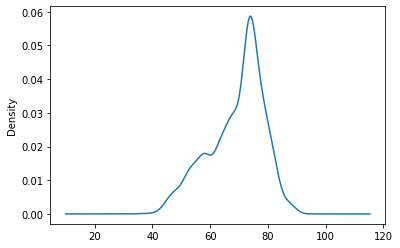

In [27]:
# standardize some numeric columns using either Zscore or MinMax, according to the columns distribution
df.Life_Exp.plot(kind='density')

Min-max normalization has one fairly significant downside: it does not handle outliers very well. Although, Z-score normalization is a strategy of normalizing data that avoids this outlier issue.

This is an amazing data set but if I forget to normalize, one of those features might completely dominate the others. It’s like throwing away almost all of my information! Normalizing solves this problem.

Therefore,

Min-max normalization: Guarantees all features will have the exact same scale but does not handle outliers well.
Z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale.

And, I will use some columns for zscore and some for min/max here. 

- For, zscore  =  Life_Expectancy, Adult_Mortality, Alcohol, HepatitisB, BMI, Tot_Exp, Income_Com_of_Resources, thinness_1to19_years, thinness_5to9_years, Schooling.

- For, Min/Max =  Infant_Deaths, Measeles, HIV/AIDS, Diptheria, GDP, Percentage_Exp, Population, Polio

In [28]:
#Zscore

def zscore_norm(x, mean, std_dev):
    z = (x - mean)/std_dev
    return z

- For, zscore  =  Life_Expectancy, Adult_Mortality, Alcohol, HepatitisB, BMI, Tot_Exp, Income_Com_of_Resources, thinness_1to19_years, thinness_5to9_years, Schooling.

In [29]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Exp', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'Hepatitis_B', 'Measles ',
       'BMI', 'under-five_deaths', 'Polio', 'Total_Exp', 'Diphtheria',
       ' HIV/AIDS', 'GDP', 'Population', 'thinness_1to19', 'thinness_5to9',
       'Income_Comp', 'Schooling', 'Status_binary', 'Life_Exp_Range'],
      dtype='object')

In [31]:
#Life_Expectancy
Life_Exp_mean = df.Life_Exp.mean()
Life_Exp_stdDev = df.Life_Exp.std()

#Adult_Mortality
Adult_Mortality_mean = df.Adult_Mortality.mean()
Adult_Mortality_stdDev = df.Adult_Mortality.std()

#Alcohol
Alcohol_mean = df.Alcohol.mean()
Alcohol_stdDev = df.Alcohol.std()

#Tot_Exp
Total_Exp_mean = df.Total_Exp.mean()
Total_Exp_stdDev = df.Total_Exp.std()

#HepatitisB
Hepatitis_B_mean = df.Hepatitis_B.mean()
Hepatitis_B_stdDev = df.Hepatitis_B.std()

#BMI
BMI_mean= df.BMI.mean()
BMI_stdDev = df.BMI.std()

#Income_Comp_Of_Resources
Income_Comp_mean = df.Income_Comp.mean()
Income_Comp = df.Income_Comp.std()


#thinness_1to19_years
thinness_1to19_mean = df.thinness_1to19.mean()
thinness_1to19_stdDev = df.thinness_1to19.std()


#thinness_5to9
thinness_5to9_mean = df.thinness_5to9.mean()
thinness_5to9_stdDev = df.thinness_5to9.std()


#Schooling
Schooling_mean = df.Schooling.mean()
Schooling_stdDev = df.Schooling.std()



In [33]:
df1=df

In [34]:
df1.head()

,Country,Year,Status,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19,thinness_5to9,Income_Comp,Schooling,Status_binary,Life_Exp_Range
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,60-70
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,50-60
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,50-60
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,50-60
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,50-60


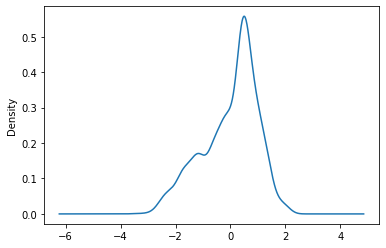

In [47]:
from scipy.stats import zscore
df1["Life_Exp"] = zscore(df1.Life_Exp)


df["Alcohol"] = zscore(df.Alcohol)


df1["Adult_Mortality"] = zscore(df1.Adult_Mortality)


df1["Hepatitis_B"] = zscore(df1.Hepatitis_B)

df1["BMI"] = zscore(df1.BMI)

df1["Total_Exp"] = zscore(df1.Total_Exp)

df1["thinness_1to19"] = zscore(df1.thinness_1to19)

df1["thinness_5to9"] = zscore(df1.thinness_5to9)


df1["Income_Comp"] = zscore(df1.Income_Comp)


df1.Life_Exp.plot(kind='density')

#likewise , plot all the charts




In [52]:
df1.columns

Index(['Country', 'Year', 'Status', 'Life_Exp', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'Hepatitis_B', 'Measles ',
       'BMI', 'under-five_deaths', 'Polio', 'Total_Exp', 'Diphtheria',
       ' HIV/AIDS', 'GDP', 'Population', 'thinness_1to19', 'thinness_5to9',
       'Income_Comp', 'Schooling', 'Status_binary', 'Life_Exp_Range'],
      dtype='object')

# Min/Max Scaler

In [53]:
# pull out numeric columns
column_names = ['Infant_Deaths','Measles ','Diphtheria','GDP','Percentage_Exp','Population','Polio']

In [54]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
from sklearn import preprocessing 

standard_scaler = preprocessing.StandardScaler()
df2_scale = df1
df2_scale[column_names] = standard_scaler.fit_transform(df2_scale[column_names])
df2_scale.head()

,Country,Year,Status,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19,thinness_5to9,Income_Comp,Schooling,Status_binary,Life_Exp_Range
0,Afghanistan,2015,Developing,-0.444448,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,...,-0.732952,0.1,-0.525248,0.389975,2.813130,2.773279,-0.725401,10.1,1,60-70
1,Afghanistan,2014,Developing,-0.980950,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,...,-0.859877,0.1,-0.523083,-0.230936,2.881408,2.817902,-0.740050,10.0,1,50-60
2,Afghanistan,2013,Developing,-0.980950,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,...,-0.775260,0.1,-0.521632,0.352715,2.926927,2.862526,-0.769349,9.9,1,50-60
3,Afghanistan,2012,Developing,-1.023029,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,...,-0.648335,0.1,-0.518723,-0.168315,2.972446,2.929461,-0.803531,9.8,1,50-60
4,Afghanistan,2011,Developing,-1.054587,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,...,-0.606027,0.1,-0.564893,-0.181666,3.040724,2.974085,-0.847480,9.5,1,50-60


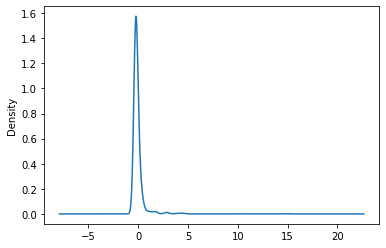

In [55]:
df2_scale.Infant_Deaths.plot(kind='density')

likewise, plot other columns

Why do we normalise?
1. Normalization makes training less sensitive to the scale of features, so we can better solve for coefficients.
After normalization, all the values are all now between 0 and 1, and the outliers are gone, but still remain visible within our normalized data. However, our features are now more consistent with each other, which will allow us to evaluate the output of our future models better.

2. The use of a normalization method will improve analysis from multiple models.
Additionally, if we were to use any algorithms on this data set before we normalized it would be hard (potentially not possible) to converge the vectors because of the scaling issues. Normalization makes the data better conditioned for convergence.


Why do we standardise?

1. Compare features that have different units or scales.

ex; of housing and income data:
Consider our data above with housing and income, both have different scales and units. We can start to compare these features and use them in our models once we have standardized them.

Later, when we are running models (logistic regression, SVMs, perceptrons, neural networks etc.) the estimated weights will update similarly rather than at different rates during the build process. This will give more accurate results when the data has been first standardized.


It seems because of the large difference in scales and units, standardizing is a better transformation for the housing and income data set.

2. Standardizing tends to make the training process well behaved because the numerical condition of the optimization problems is improved.

However, if you do standardize your data be warned you might be discarding some information. If that information is not needed, the process can be helpful else it will impede your results.


# Correlation;  
that indicates the extent to which two variables are linearly related.

In [58]:
corr_mat = df2_scale.corr()


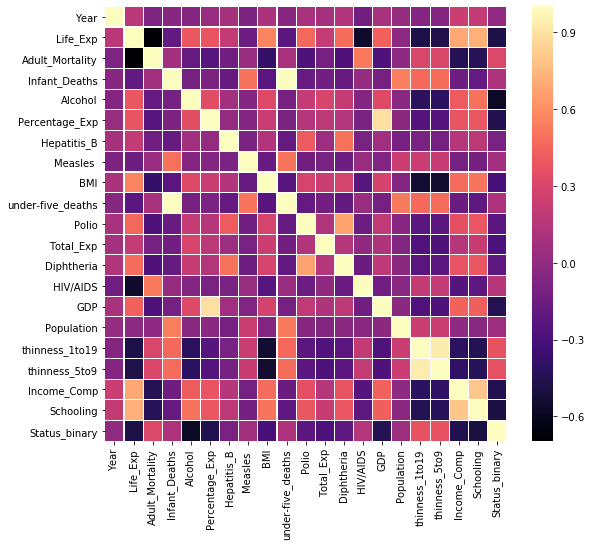

In [59]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap ="magma", linewidths = 0.1) 